LaTeX Markdown:

# Notebook Imports and Packages

In [21]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

# $$f(x) = x^2 + x + 1$$

Generating data with numpy:

In [27]:
 def f(x):
        return x**2 + x + 1

In [28]:
# Make data:
x_1 = np.linspace(start=-3, stop=3, num=500)

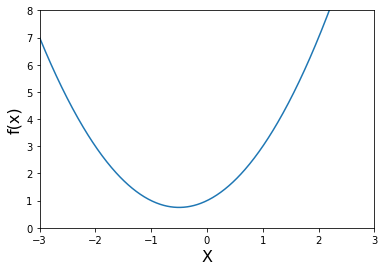

In [43]:
# Plot:
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives:
Challenge: create a python function for the derivative of $f(x)$ called df(x)

In [44]:
def df(x):
    return 2*x + 1

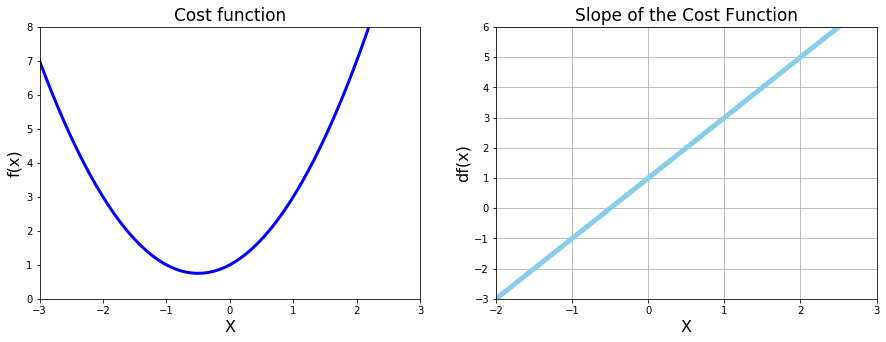

In [45]:
# Plot function and derivative side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

# Python Loops & Gradient Descent:

Loops in Python:

In [48]:
# Python For loop:
for n in range(5):
    print('Hello World', n)
print('End of For loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of For loop


In [49]:
# Python While loop:
counter =  0
while counter < 7:
    print('Counting...', counter)
    counter = counter + 1
print('Ready or not here I come!')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Ready or not here I come!


Gradient Descent:

In [60]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size  = abs(new_x - previous_x)
#     print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
        
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


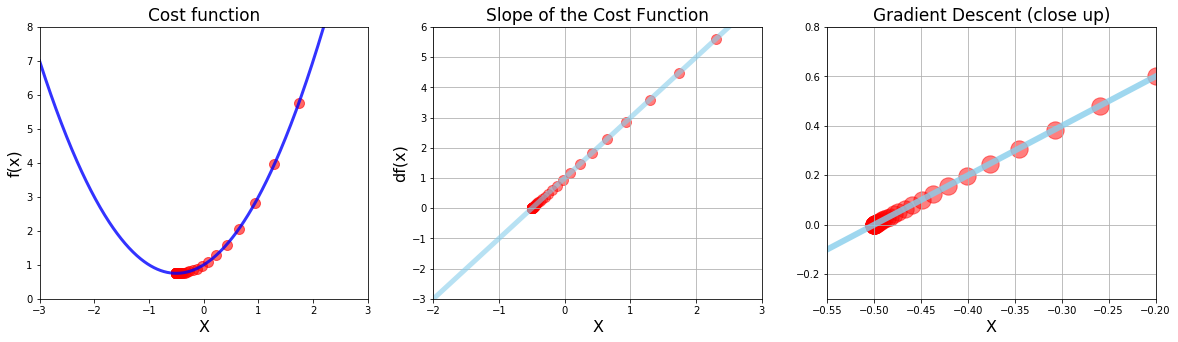

In [68]:
# Superimpose the gradient descent calculations on the plot:
plt.figure(figsize=[20,5])

# Chart 1: The Cost Function:
plt.subplot(1, 3, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,3,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (closeup):
plt.subplot(1,3,3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.grid()
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()